In [1]:
import pandas as pd 
import numpy as np 
from dcapy import dca
from dcapy.schedule import Well, Period, Scenario, WellsGroup,  model_from_dict
from dcapy.cashflow import CashFlowParams, CashFlow
from dcapy.wiener import Brownian, GeometricBrownian, MeanReversion
import seaborn as sns 
from datetime import date
import matplotlib.pyplot as plt
import copy
import yaml
import json
from scipy import stats

In [2]:
with open('FDP_example1.yml','r') as file:
    lp_dict = yaml.load(file)

<ipython-input-2-5ea6399cb761>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  lp_dict = yaml.load(file)


In [3]:
lp = model_from_dict(lp_dict)

print(type(lp))

<class 'dcapy.schedule.schedule.WellsGroup'>


In [4]:
sc = lp.scenarios_maker()
sc

[{'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['highfr']},
 {'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['highfr']},
 {'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['mediumfr']},
 {'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['mediumfr']}]

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

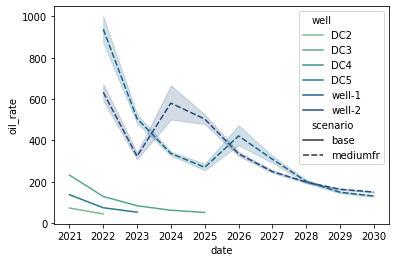

In [5]:
#fwn= lp.generate_forecast(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
fwn= lp.generate_forecast(wells=sc[3],freq_output='A',iter=50, seed=21)

#fwn
sns.lineplot(data=fwn, x=fwn.index.to_timestamp(), y='oil_rate', hue='well',style='scenario',palette='crest')


In [6]:
#cwn= lp.generate_cashflow(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
cwn= lp.generate_cashflow(wells=sc[3],freq_output='A')

In [7]:
fcf_0= cwn[0].fcf()
fcf_0

,income_fdp_field-DC2-base-pdp,income_fdp_field-DC3-base-pdp,income_fdp_field-DC3-base-pdp,income_fdp_field-DC4-base-pdp,income_fdp_field-DC4-base-pdp,income_fdp_field-DC4-base-pdp,income_fdp_field-DC5-base-pdp,income_fdp_field-DC5-base-pdp,income_fdp_field-DC5-base-pdp,income_fdp_field-DC5-base-pdp,...,capex_abandon_fdp_field-well-2-mediumfr-uppermir,buy,buy,buy,buy,buy,buy,total_capex,fcf,cum_fcf
2021,1.119039e+06,3.531522e+06,3.531522e+06,945526.852134,945526.852134,945526.852134,2.093743e+06,2.093743e+06,2.093743e+06,2.093743e+06,...,0.0,-7500000.0,-7500000.0,-7500000.0,-7500000.0,-7500000.0,-7500000.0,-45200000.0,-2.993704e+07,-2.993704e+07
2022,2.117811e+04,2.483709e+06,2.483709e+06,0.000000,0.000000,0.000000,1.440537e+06,1.440537e+06,1.440537e+06,1.440537e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8200000.0,1.933505e+08,1.634135e+08
2023,0.000000e+00,1.986732e+06,1.986732e+06,0.000000,0.000000,0.000000,5.299503e+05,5.299503e+05,5.299503e+05,5.299503e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-800000.0,2.539380e+08,4.173515e+08
2024,0.000000e+00,1.077773e+06,1.077773e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.087094e+08,5.260609e+08
2025,0.000000e+00,5.304572e+05,5.304572e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-800000.0,1.538230e+08,6.798839e+08
2026,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.341862e+07,7.333025e+08
2027,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.094885e+07,7.642514e+08
2028,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.260895e+07,7.868603e+08
2029,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.286343e+07,8.197237e+08
2030,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-200000.0,0.0,0.0,0.0,0.0,0.0,0.0,-400000.0,-3.214347e+06,8.165094e+08


In [15]:
fcf_0['cum_fcf'].values

array([-2.99370350e+07,  1.63413506e+08,  4.17351459e+08,  5.26060904e+08,
        6.79883890e+08,  7.33302513e+08,  7.64251361e+08,  7.86860308e+08,
        8.19723735e+08,  8.16509388e+08])

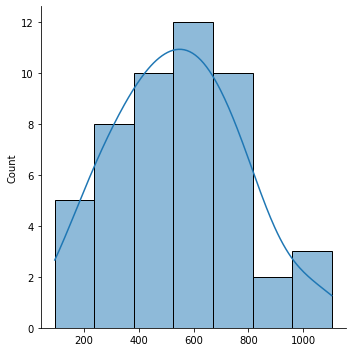

In [8]:
npv = lp.npv([0.15], freq_rate='A', freq_cashflow='A')/1e6

sns.displot(npv['npv'].values, kde=True)

In [9]:
npv['npv'].quantile([0.1,0.5,0.9])

0.1    245.240771
0.5    541.352721
0.9    805.521278
Name: npv, dtype: float64

/home/scuervo/Documents/dev/apps/dcapy/dcapy/cashflow/cashflow.py:342: UserWarning: FixedFormatter should only be used together with FixedLocator
  grax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks])
/home/scuervo/Documents/dev/apps/dcapy/dcapy/cashflow/cashflow.py:350: UserWarning: FixedFormatter should only be used together with FixedLocator
  spax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks_cum])


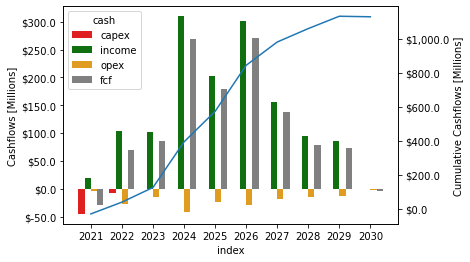

In [10]:
cwn[38].plot(cum=True,format='m')

In [11]:
cwn[0].get_cashflow_period()

,index,cash,value
0,2021,capex,-4.520000e+07
1,2021,income,1.939364e+07
2,2021,opex,-4.130672e+06
3,2022,capex,-8.200000e+06
4,2022,income,2.405381e+08
5,2022,opex,-3.898755e+07
6,2023,capex,-8.000000e+05
7,2023,income,2.954190e+08
8,2023,opex,-4.068108e+07
9,2024,income,1.351638e+08


# Weiner

In [12]:
oil_mr = MeanReversion(
    initial_condition = 66,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':5.13}},
    m=46.77,
    eta=0.112652,
    freq_input = 'A'
)

<AxesSubplot:>

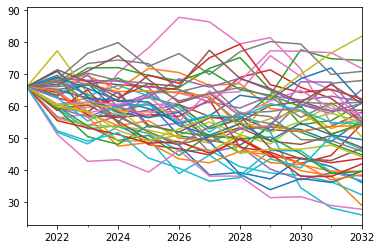

In [13]:
price_mr = oil_mr.generate(12,50, freq_output='A', seed=21)

price_mr.plot(legend=False)